In [76]:
################################################################
################################################################
#Company: Critical Techworks (CTW)
#Course: 7th. Data Academy lisbon - PT
#Module: Machine Learning & Artificial Intelligence
#Author: Carlos Fernando Arraz | Date: May 16th, 2024
#Lab 1: Naive-Bayes Classifier from scratch
################################################################
################################################################

# This script aims to show the theory that supports the development of the Naive Bayes classifier, in addition to implementing (step-by-step) the algorithm through a Python script. 🐍. 

**Finally, demonstrate its efficiency and compare results with algorithms already implemented in other Python libraries (such as SciKit-Learn).**

---

**INSTRUCTIONS:**

---

1 - Make a copy of this file in your repository to start practicing;

2 - Study and review the theoretical content (highlighted: concepts of probability, Bayes' theorem, conditional probability, and joint probability);

3 -Read the theory and follow the Python script line by line and its comments (execute the cells with **shift + ENTER** or play button to the left of each command/code block), studying the structures, the parts of the algorithm and the proposed logic;

4 - Execute, modify, test, and experiment with the content to the fullest to internalize the knowledge.


# Theory: Bayesian e Naive Bayes Classfifier

Intuitive idea

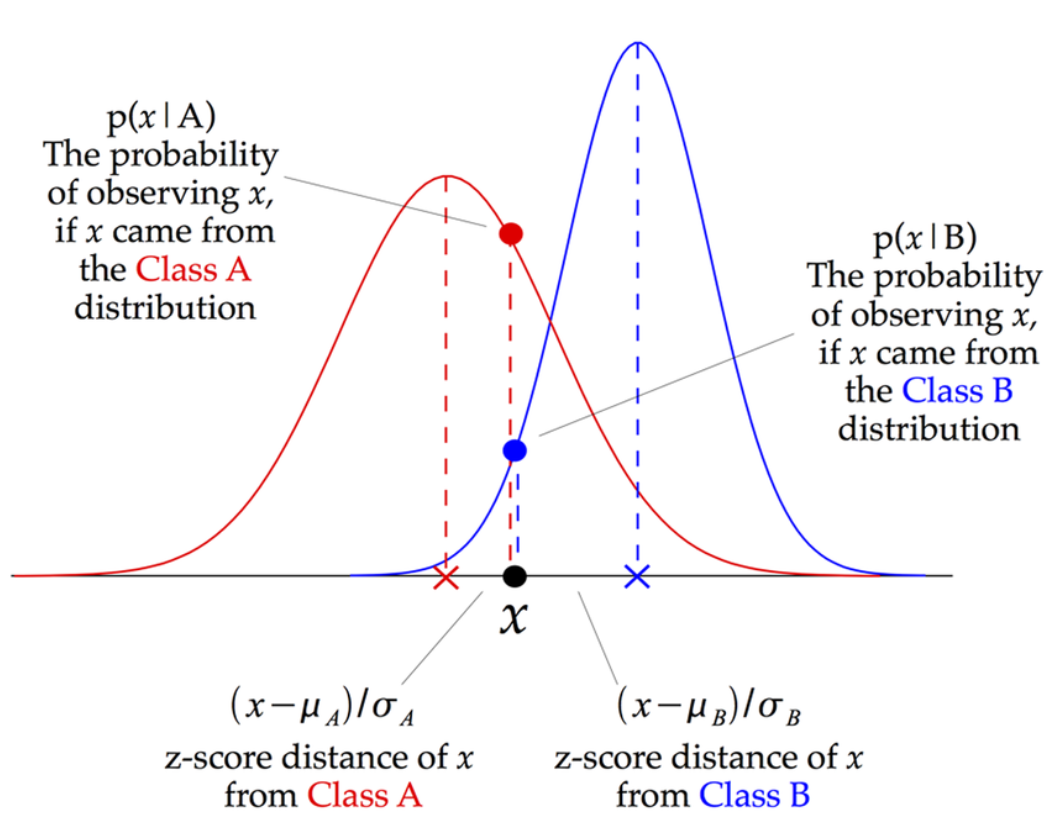

Firstly, let's remember Bayes' Theorem expression, as well as the definition of each one of the terms that belong to this expression: 

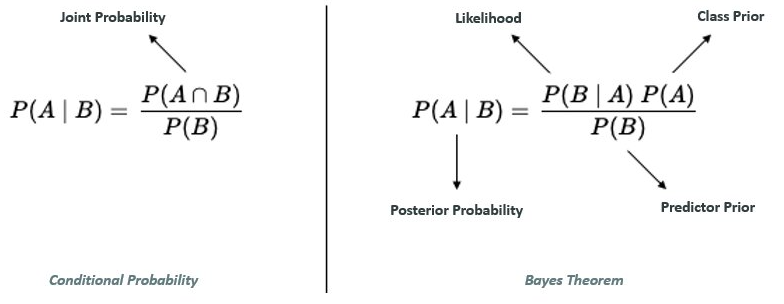

Let's now use common sense, where probabilistic concepts can determine the classification of an observation. To illustrate, let's consider just 2 classes: $C_1$ and $C_2$ . Then, using Bayes' theorems, given an $x$, the probability of this observation $x$ belonging to a certain class is determined by:

\begin{equation}
P(C_1 | x) > P(C_2 | x) \implies {x \in C_1}; \\
P(C_1 | x) < P(C_2 | x) \implies {x \in C_2}; \\
\end{equation}

Note that, according to Bayes' theorem, we can calculate the probability of each observation for each class, which will lead us to classify this observation to the class that presents the highest probability in the training data set.

Classification can be based on two approaches: parametric and non-parametric. In this practice, we will choose the parametric approach, which seeks an answer through a distribution (as we can select a certain probability distribution, such as the normal one). Next, let's consider a database $\mathcal D$. Note that, given a new observation $x$, it is possible to estimate its parameters based on the data set $\mathcal D$, and thus, we obtain $P(x), \forall x\in C_k$, with $k=1 ,2,\cdots, K$ , such that $\mathcal D = C_1 \cup C_2 \cup \cdots \cup C_k $ and $C_k \cap C_l = \emptyset , \forall l \neq k$.

Note that, at this point, we can calculate the values of the theorem's numerator through Bayes' theorem, which is enough to determine which class that observation belongs to. But, notice that the parameters of the term $P(x | C_k)$ of

$$
P(C_k | x ) = \frac{P(x | C_k)P(C_k)}{P(x)}, \text{where } k = 1,2, \cdots, K
$$

can be estimated using the maximum likelihood method. Note also that, to perform this calculation, we need a training base for each class, to obtain parameters (in the case of normal dist.) $ \hat{\mu}_k$ and $\hat{\sigma_k^2 }$ for all $k=1,2, \cdots, K$. Here we will omit the calculations to find the maximum likelihood estimators, but they can be consulted in references [1][2][3], where we can verify that the mean and variance in each of the coordinates offer the best estimators in this case and with the slightest error.

The issue is that, the likelihood, when we increase the number of variables (in English, *features*), $P(x|C_k)$ becomes difficult to estimate, increasing the challenge of maintaining good classifier results.

The Naive-Bayes classifier has a great feature that circumvents (simplifies, by construction) the limitations of the Bayesian classifier (Bayesian decision theory), as it assumes total independence between attributes and assumes that the likelihood is calculated as the product of the marginal probabilities of each attribute. This assumption is pretty strong, which is the main basis of the Naive Bayes classifier.

Next, we define a function to calculate the joint probability density: $$p(\vec{x}|C_k) = \prod_{j=1}^d p(x_j|C_k), \quad k=1,\ldots , K$$
where $C_k$ are the classes and $x_j$ with $j=1,2, \cdots, d$ denotes the attributes. If the distribution is normal, we have that each attribute $x_j$ has the following associated probability density function, for each class:

$$
p(x_j|C_k) = \frac{1}{\sqrt{2\pi\sigma_{C_k}}}\exp \left[ -\frac{1}{2}\left( \frac{x_j-\mu_ {C_k}}{\sigma_{C_k}}\right)^2 \right], \quad k=1,2,\cdots K, x_j \in C_k
$$

Thus, we define a function to calculate the likelihood function.

## Example 1 (Discrete case): Practical application of the theory with Python

Note that for this discrete case, we do not need a distribution, as the amount of data is small, it is possible to calculate the probability individually for each attribute. Note that as we have increased the amount of data the task becomes more and more challenging. This is where the use of computing and statistical theory comes in, and it is only necessary to scale the solution through computer code. And we will do so in this itinerary!!

Imagine that a hospital treats people with the flu and systematically writes down the symptoms as variables, in a table format, where the lines represent the patients, the first 4 columns are the variables and the last column is the diagnosis (or, response variable). Below is the table with the hospital notes:

$$
\begin{aligned}[]
\begin{array}{lllll}
\hline
x_1 = Chills & x_2 = Runny nose & x_3 = Headache & x_4 = Fever & Flu \\ \hline
Yes           & No                & Average         & Yes          & No  \\ \hline
Yes           & Yes               & No              & No           & Yes \\ \hline
Yes           & No                & Strong          & Yes          & Yes \\ \hline
No            & yes               & Average         & Yes          & Yes \\ \hline
No            & No                & No              & No           & No  \\ \hline
No            & Yes               & Strong          & Yes          & Yes \\ \hline
No            & Yes               & Strong          & No           & No  \\ \hline
Yes           & Yes               & Average         & Yes          & Yes \\ \hline
\end{array}
\end{aligned}
$$

Consider that the table above is the training base, where there is knowledge about the flu diagnosis in light of the symptoms. Then, a new patient arrives at the hospital showing the following symptoms:

* Chills = yes;
* Runny nose = No;
* Headache = Average; It is
* Fever = No.

What will this patient's diagnosis be?

Let's transform this data into a vector, which we denote by $\vec{x}_{obs}$. Then, we have an input:


\begin{align}
\vec{x}_{obs} &= \begin{bmatrix}
                     x_{1} = Yes \\
                     x_{2} = No \\
                     x_{3} = Average\\
                     x_{4} = No
                   \end{bmatrix}
\end{align}


See that:

$$
P(C_k | \vec{x}_{obs} ) = \frac{P(\vec{x}_{obs} | C_j)P(C_k)}{P(\vec{x}_{obs}) }, \text{where } k = 1,2.
$$


Therefore, we need to calculate:

$P(\vec{x}_{obs} | Flu = Yes)P(Flu = Yes)$, $P(\vec{x}_{obs})$ and $P(\vec{x}_{ obs} | Flu = No)P(Flu = No)$.


Taking into account the new patient, which we denote by $\vec{x}_{obs}$, we have that:

1)
$$
P(\vec{x}_{obs} | Flu = Yes)P(Flu = Yes) = P(x_1 = Yes | Flu = Yes) \times P(x_2 = No | Flu = Yes) \times P(x_3 = Average | Flu = Yes) \times P(x_4 = No | Flu = Yes) \times P(Flu = Yes) = \\
= \frac{3}{5} \times \frac{1}{5} \times \frac{2}{5} \times \frac{1}{5} \times \frac{5}{8} = 0.006
$$


two)
$$
P(\vec{x}_{obs} | Flu = No)P(Flu = No) = P(x_1 = Yes | Flu = No) \times P(x_2 = No | Flu = No) \times P(x_3 = Average | Flu = No) \times P(x_4 = No | Flu = No) \times P(Flu = Yes) = \\ =
\frac{1}{3} \times \frac{2}{3} \times \frac{1}{3} \times \frac{2}{3} \times \frac{3}{8} = 0.019
$$


3)
$$
P(\vec{x}_{obs}) = P(\vec{x}_{obs} | Flu = Yes)P(Flu = Yes) + P(\vec{x}_{obs} | Flu = No)P(Flu = No) = 0.025
$$


Given the results, given a new patient ($x_{obs}$), we can calculate the probability of having the flu or not, according to the following calculations:

$$
P(Flu = Yes | \vec{x}_{obs}) = \frac{P(\vec{x}_{obs} | Flu = Yes)P(Flu = Yes)}{P(\vec{x }_{obs})} = 0.24
$$

It is

$$
P(Flu = No | \vec{x}_{obs}) = \frac{P(\vec{x}_{obs}| Flu = No)P(Flu = No)}{P(\vec{x }_{obs})} = 0.76
$$

**Conclusion:** As $P(Flu = No | \vec{x}_{obs}) > P(Flu = Yes | \vec{x}_{obs})$ using the training data, we can say that the new patient does not have the flu, that is, the result is:

**Flu = No**


---

Calculation sheet (draft):

---

In [77]:
P_gripesim = (3/5)*(1/5)*(2/5)*(1/5)*(5/8); P_gripesim

0.006

In [78]:
P_gripenao = 1/3*2/3*1/3*2/3*3/8; P_gripenao

0.018518518518518517

In [79]:
PX = P_gripesim + P_gripenao; PX

0.024518518518518516

In [80]:
print(P_gripesim/PX, P_gripenao/PX)

0.24471299093655594 0.7552870090634441


## Example 2 (Continuous case): Practice script implemented in Python [4]





In [81]:
#Load python libraries
import random
random.seed(7) # define a seed (important for reproducing results)
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split #partitions training and testing
from sklearn.metrics import accuracy_score #checks model accuracy

In [82]:
#Load the data
##########DOWNLOAD THE DATASET AND THEN UPLOAD .csv ON GOOGLE COLAB#########
#data source: https://www.kaggle.com/datasets/uciml/iris
################################################ #############################

#Load the data into a dataframe
data = pd.read_csv(r'C:\Users\CTW03366\OneDrive - Critical Techworks\CTW\datasets\Iris.csv', header=(0))


#stores class names
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)

print("Check the number of rows and columns in the attribute matrix:", data.shape)
attributes = list(data.columns)
data.head(10) #see the first 10 copies of the database

Check the number of rows and columns in the attribute matrix: (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [83]:
# Check the classe' name
print(classes)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Selecting the training and testing sets.

In [84]:
#Preparing the data
data = data.to_numpy() #transforms the dataframe into a numpy vector
nrow,ncol = data.shape #read the number of rows and columns in the database
y = data[:,-1] #stores information from the response variable (class)
X = data[:,1:ncol-1] #separates numeric data from the class

In [85]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [86]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

**Parte 1:**





In [87]:
#Check the dimensions of vectos X and y
print(X.shape, y.shape)

(150, 4) (150,)


In [108]:
#build the training and test partition
partition = 0.7 # fraction of elements in the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = partition, random_state = 12)

### Classification: implmentation of method

In [121]:
#Creation of two functions:
   #1-Gaussian that calculates the probability of an observation;
   #2-likelyhood calculates the likelihood of the numerator of Bayes theorem.

def gaussian(x, mu, sig):
    return (1/np.sqrt(2*np.pi*sig))*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def likelyhood(x, Z):
    lk = 1
    for j in np.arange(0, Z.shape[1]):
        m = np.mean(Z[:,j])
        s = np.std(Z[:,j])
        lk = lk*gaussian(x[j], m, s)
    return lk

Here, we do the classes estimation 

In [139]:
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes)
for i in np.arange(0, len(classes)):
    elements = tuple(np.where(y_train == classes[i]))
    Z = X_train[elements[0],:]
    for j in np.arange(0, X_test.shape[0]):
        x = X_test[j,:]
        pj = likelyhood(x,Z)
        P[classes[i]][j] = pj*len(elements)/X_train.shape[0]

In [143]:
#check structure of matrix P (first 10 records)
################################################ #####################
#NOTE: See that each line has the value of the probability of belonging to
#class with the highest probability
################################################ #####################
P.head(45)

,Iris-setosa,Iris-versicolor,Iris-virginica
0,2.495574e-03,6.938486e-22,1.842117e-25
1,2.490323e-152,3.483390e-06,2.149173e-04
2,2.685059e-04,2.113265e-23,4.900614e-27
3,4.387719e-76,1.632843e-03,5.913284e-07
4,9.454616e-234,6.474844e-13,5.366446e-04
5,6.330855e-170,9.739844e-07,8.938970e-04
6,3.985592e-202,2.950819e-11,3.013304e-04
7,5.335840e-03,2.105083e-21,5.212016e-25
8,1.197729e-254,2.471596e-15,1.308360e-04
9,4.270947e-05,1.998052e-16,4.457721e-21


In [141]:
#check the accuracy of the model (Accuracy)
y_pred = []
for i in np.arange(0, P.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]])) #selects the class that has the highest prob.
    y_pred.append(P.columns[c]) #stores the class name
y_pred = np.array(y_pred, dtype=str)

score = accuracy_score(y_pred, y_test) #compares the prediction with the real class
print('Accuracy:', score)

Accuracy: 0.9777777777777777


### Double check in the Classification: scikit-learn library

We can perform the classification using the function available in the scikit-learn library.

In [142]:
#load libraries with Naive Bayes implemented
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB() #instantiates the object to receive X_train and y_train
model.fit(X_train, y_train) #trains the model with the same X_train and y_train

y_pred_sktleearn = model.predict(X_test) #performs the test partition prediction
score = accuracy_score(y_pred_sktleearn, y_test) #calculates the accuracy of the model
print('Accuracy:', score)

Accuracy: 0.9777777777777777


**References:**

[1] Code adapted from online source (under Creative Commons Zero v1.0 Universal license): https://github.com/franciscoicmc/ciencia-de-dados/blob/master/Aula4-Classificacao-Naive%20Bayes.ipynb. Accessed on 05/03/2024.

[2] **Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani**, “An Introduction to Statistical Learning, with Applications in R”, Springer Texts in Statistics, Springer, 2013.

[3] **MORETTIN, Pedro A.; BUSSAB, Wilton O.** Estatística Básica. Saraiva Educação SA, 2017.

[4] **VANDERPLAS, Jake. Python data science handbook: Essential tools for working with data.** " O'Reilly Media, Inc.", 2016.